In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

In [16]:
ycases = np.loadtxt('i.csv', dtype='float')
ydeaths = np.loadtxt('m.csv', dtype='float')

ydata = np.hstack((ycases, ydeaths))
# ydata = np.concatenate(:)
ydata = np.array(ydata, dtype = float)

xdata = list(range(1, len(ycases)+1))
xdata = np.array(xdata, dtype=float)
print(ydata.shape)
xdata.shape

(320,)


(160,)

In [17]:
Nmax = 3989167  ## it should be the population... not sure...


def sird_model(y, x, beta, gamma, mu):
    dS = -beta * y[0] * y[1] / Nmax 
    dR = gamma * y[1]
    dM = mu * y[1]
    dI = -(dS + dR + dM)
    return dS, dI, dR, dM

In [18]:
def fit_odeint(x, beta, gamma, mu, S0, I0, N):
    R0 = 0 # assumnption: initially there are no recovery
    M0 = Nmax - S0 - I0 - R0 ## enforcing the constraint
    
    ret =  integrate.odeint(func = sird_model, y0 = (S0, I0, 0, M0), t = x, args=(beta, gamma, mu))
    
    i = ret[:,1]
    m = ret[:,3]
#     print(type(i))
    im = np.hstack((i,m))
#     print(im.shape)
    return im
    
                                                        




popt, pcov = optimize.curve_fit(f = fit_odeint, xdata = xdata, ydata = ydata, maxfev = 10000,
                                p0 = (0.5, 0.5, 0.5, Nmax, 10, Nmax),
                               bounds = [[0,0,0,0,0,0], [1,1,1,Nmax,Nmax,Nmax]])



beta = popt[0]
gamma = popt[1]
mu = popt[2]
S0 = popt[3]
I0 = popt[4]
R0 = 0 ## assumption
N = popt[5]
M0 = N - S0 - I0 - R0

print('beta ', beta)
print('gamma ', gamma)
print('mu ', mu)
print('S0 ', S0)
print('I0 ', I0)
print('R0 ', R0)
print('M0 ', M0)
print('N ', N)

beta  0.5329622785523699
gamma  0.471039707697603
mu  0.06120275257728743
S0  3989166.998059043
I0  13.838302053358115
R0  0
M0  -13.836760013211228
N  3989166.9996010833


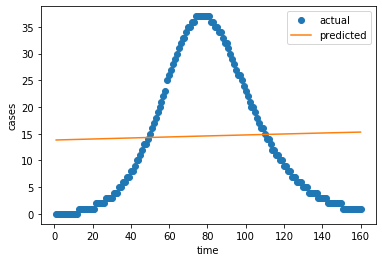

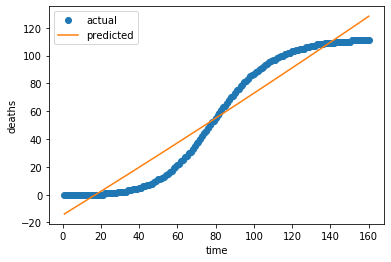

In [19]:
fitted = fit_odeint(xdata, *popt)

print('')


plt.plot(xdata, ycases, 'o', label='actual')
plt.plot(xdata, fitted[:len(ycases)], label='predicted')
plt.xlabel('time')
plt.ylabel('cases')
plt.legend()
plt.show()




plt.plot(xdata, ydeaths, 'o', label='actual')
plt.plot(xdata, fitted[len(ycases):], label='predicted')
plt.xlabel('time')
plt.ylabel('deaths')
plt.legend()

plt.show()

In [19]:
integrate.solve_ivp?

Signature:
integrate.solve_ivp(
    fun,
    t_span,
    y0,
    method='RK45',
    t_eval=None,
    dense_output=False,
    events=None,
    vectorized=False,
    **options,
)
Docstring:
Solve an initial value problem for a system of ODEs.

This function numerically integrates a system of ordinary differential
equations given an initial value::

    dy / dt = f(t, y)
    y(t0) = y0

Here t is a one-dimensional independent variable (time), y(t) is an
n-dimensional vector-valued function (state), and an n-dimensional
vector-valued function f(t, y) determines the differential equations.
The goal is to find y(t) approximately satisfying the differential
equations, given an initial value y(t0)=y0.

Some of the solvers support integration in the complex domain, but note that
for stiff ODE solvers, the right-hand side must be complex-differentiable
(satisfy Cauchy-Riemann equations [11]_). To solve a problem in the complex
domain, pass y0 with a complex data type. Another option is always to

In [ ]:
df = pd.DataFrame({
    'Actual': extended_actual,
    'S': prediction.y[0],
    'I': prediction.y[1],
    'R': prediction.y[2],
     'M'
})
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title(self.state)
df.plot(ax=ax)

In [25]:
integrate.odeint?

Signature:
integrate.odeint(
    func,
    y0,
    t,
    args=(),
    Dfun=None,
    col_deriv=0,
    full_output=0,
    ml=None,
    mu=None,
    rtol=None,
    atol=None,
    tcrit=None,
    h0=0.0,
    hmax=0.0,
    hmin=0.0,
    ixpr=0,
    mxstep=0,
    mxhnil=0,
    mxordn=12,
    mxords=5,
    printmessg=0,
    tfirst=False,
)
Docstring:
Integrate a system of ordinary differential equations.

.. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
          differential equation.

Solve a system of ordinary differential equations using lsoda from the
FORTRAN library odepack.

Solves the initial value problem for stiff or non-stiff systems
of first order ode-s::

    dy/dt = func(y, t, ...)  [or func(t, y, ...)]

where y can be a vector.

.. note:: By default, the required order of the first two arguments of
          `func` are in the opposite order of the arguments in the system
          definition function used by the `scipy.integrate.ode` class and
          the 

In [24]:
optimize.curve_fit?

Signature:
optimize.curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=True,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``

Parameters
----------
f : callable
    The model function, f(x, ...).  It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like or object
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, but can actually be any object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N).  If None, then the
    initial values will all be 1 (if the number of parameters for th